**API** — Интерфейс программирования приложений - это интерфейс взаимодействия между программами, а если говорить о WEB, то это интерфейс взаимодействия различных сайтов со сторонними приложениями
 
 **API** облегчает жизнь программистам.
 
 Подробнее 
   - почитать можно тут например: https://techrocks.ru/2018/05/29/api-simple-explanation/
   - посмотреть можно тут: https://www.youtube.com/watch?v=CeGq2L0AmZE          

Нас интересует **Telegram Bot API**  - это HTTP-интерфейс, созданный для разработчиков,которые хотят создавать ботов для Telegram. Ознакомится с ним детально можно на сайте https://core.telegram.org/bots/api

Для работы с **Telegram Bot API** уже создано несколько интерфейсов. Поэтому нам не понадобится писать много кода. Мы будем исользовать **python-telegram-bot**. Его репозиторий на гитхабе:

https://github.com/python-telegram-bot/python-telegram-bot#learning-by-example

__________
**Теперь сам бот**

делаем по инструкции [статьи](https://medium.com/nuances-of-programming/%D0%BA%D0%B0%D0%BA-%D1%81%D0%BE%D0%B7%D0%B4%D0%B0%D1%82%D1%8C-telegram-%D0%B1%D0%BE%D1%82%D0%B0-%D1%81-%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E-python-a80592e0ffe9)

Мы на паре делали в виртуальном окружении.   
О нем можно почитать например тут:   
https://pythoner.name/documentation/tutorial/venv   
https://uoa-eresearch.github.io/eresearch-cookbook/recipe/2014/11/20/conda/


**python-telegram-bot** содержит свою инструкицю по созданию бота:

https://github.com/python-telegram-bot/python-telegram-bot/wiki/Extensions-%E2%80%93-Your-first-Bot

очень рекомендую с ней ознакомиться. Там есть и описание классов, которые используются для создания бота.



Далее мой скрипт. Что добавлено:
 - если вводится неизвестная комадна - бот говорит, что такую не знает
 - \\caps sometext - к верхнему регистру
 - \weather - сообщает погоду в риме (не сделала вывод города)
 
 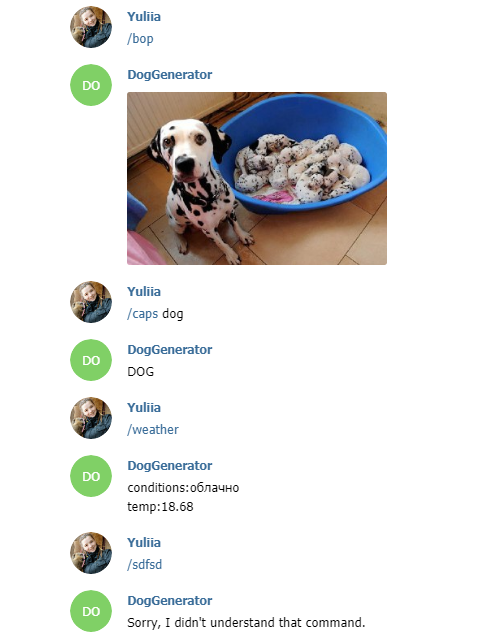

In [ ]:

 # -*- coding: utf-8 -*-
"""
Created on Wed May 15 17:17:11 2019

@author: YuShc
"""

from telegram.ext import Updater, InlineQueryHandler, CommandHandler, MessageHandler, Filters    

import requests
import logging

logging.basicConfig(format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
                     level=logging.INFO)
logger = logging.getLogger(__name__)

def echo(update, context):
    context.bot.send_message(chat_id=update.message.chat_id, text=update.message.text)

def get_url():
    contents = requests.get('https://random.dog/woof.json').json()
    url = contents['url']
    return url

def get_weather_info():
    s_city = "Rome,IT"
    city_id = 0
    appid = "216a787399aec3a62f2b53858284ef24"
    rezult = ""
    try:
        res = requests.get("http://api.openweathermap.org/data/2.5/find",
                 params={'q': s_city, 'type': 'like', 'units': 'metric', 'APPID': appid})
        data = res.json()
        city_id = data['list'][0]['id']
        res = requests.get("http://api.openweathermap.org/data/2.5/weather",
                 params={'id': city_id, 'units': 'metric', 'lang': 'ru', 'APPID': appid})
        data = res.json()
        rezult = "conditions:" +str( data['weather'][0]['description']) +\
                 "\ntemp:" + str( data['main']['temp'])
    except Exception as e:
       print("Exception (find):", e)
       pass
    return rezult

def bop(bot, update):
    """ send dog photo"""
    url = get_url()
    chat_id = update.message.chat_id
    bot.send_photo(chat_id=chat_id, photo=url)
    
def weather(bot,update):
    answer = get_weather_info()
    bot.send_message(chat_id=update.message.chat_id, text=answer) 
    
def caps(bot, update, args):
    """ caps text that goes after \caps command """
    text_caps = ' '.join(args).upper()
    bot.send_message(chat_id=update.message.chat_id, text=text_caps)    
    
def unknown(bot, update):
    """for unknown command"""
    bot.send_message(chat_id=update.message.chat_id, text="Sorry, I didn't understand that command.") 
    
def error(update, context):
    """Log Errors caused by Updates."""
    logger.warning('Update "%s" caused error "%s"', update, context.error) 
    
    
def main():
    updater = Updater(token='885071193:AAHWfnWX9Eu0pz7dvGMCCwCTW2453AyRaw0')
    dp = updater.dispatcher
    dp.add_handler(CommandHandler('bop',bop))
    
    dp.add_handler(MessageHandler(Filters.text, echo))
    
    dp.add_handler(CommandHandler('caps', caps, pass_args=True))
    
    dp.add_handler(CommandHandler('weather',weather))
    
    dp.add_handler(MessageHandler(Filters.command, unknown))
    
    # log all errors
    dp.add_error_handler(error)
    
    updater.start_polling() # запускаем бота
    updater.idle()
if __name__ == '__main__':
    main()

Если вам интересно разобраться с погодой и попробовать вывести другую информацию,

читаем тут: https://openweathermap.org/current

Если вы хотите выгрузить бота на сервер, попробуйте использовать инструкцию из статьи (ближе к концу):
https://proglib.io/p/telegram-bot/
